# Manual Round 3

Generate distribution

In [47]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [14]:
def gen_turtle_sample(n=1):
    left = [160, 200]
    right = [250, 320]
    a = left[1] - left[0]
    b = right[1] - right[0]
    width_ratio = a/(a+b)

    out = np.empty(n, dtype=int)
    for i in range(n):
        if np.random.rand() < width_ratio:
            out[i] = (np.random.randint(left[0], left[1]))
        else:
            out[i] = (np.random.randint(right[0], right[1]))

    return out

In [ ]:
print(gen_turtle_sample(10))

Formula for scale factor

In [25]:
def p(avg_bid, your_bid):
    return ((320 - avg_bid) / (320 - your_bid)) **3

In [56]:
def profit(sample, buy1, buy2, buy2_avg):
    profit = 0
    sales1 = sample <= buy1
    no_sales1 = sum(sales1)
    profit += no_sales1 * (320 - buy1)

    sample = sample[~sales1]
    sales2 = sample <= buy2
    no_sales2 = sum(sales2)
    profit += no_sales2 * (320 - buy2)

    sample = sample[~sales2]
    no_sales3 = len(sample)
    profit += no_sales3 * (320 - buy2)*p(buy2_avg, buy2)

    return profit

In [60]:
sample = gen_turtle_sample(1000)
profit(sample, 210, 290, 290)

np.float64(59280.0)

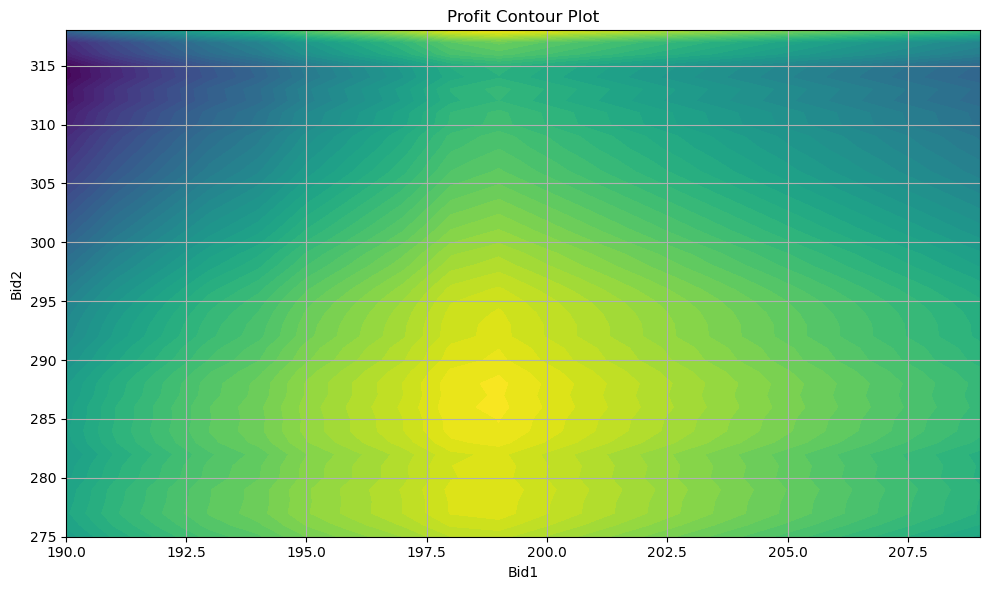

In [90]:
# Parameters
bid1s = np.arange(190, 210, 1)  # Your potential second bids from 260 to 290
bid2s = np.arange(275, 319, 1)  # Simulated average second bids from 260 to 290
avg_bid = 304 # This function flips around 305. Looks 303 very different from 306

# Create a matrix to store profits
profits = np.zeros((len(bid1s), len(bid2s)))
# Calculate profits for each combination of bids
for i, bid1 in enumerate(bid1s):
    for j, bid2 in enumerate(bid2s):
        profits[i, j] = profit(sample, bid1, bid2, avg_bid)

x, y = np.meshgrid(bid1s, bid2s)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.contourf(x, y, profits.T, levels=50, cmap="viridis")
# plt.colorbar(c)
plt.title("Profit Contour Plot")
plt.xlabel("Bid1")
plt.ylabel("Bid2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
minimize(
    lambda x: -profit(sample, x[0], x[1], 300),
    x0=[190, 290],
    bounds=[(160, 200), (250, 319)],
    method='L-BFGS-B',
)

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: -7890240.0
        x: [ 1.600e+02  3.190e+02]
      nit: 1
      jac: [ 1.397e+01 -5.600e+12]
     nfev: 6
     njev: 2
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [44]:
minimize(
    lambda x: -profit(sample, x[0], 270, 270),
    x0=[200],
    method='nelder-mead',
)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -53119.99997794628
             x: [ 1.990e+02]
           nit: 38
          nfev: 76
 final_simplex: (array([[ 1.990e+02],
                       [ 1.990e+02]]), array([-5.312e+04, -5.312e+04]))

Let's test some what if scenarios 

In [5]:
p(avg_bid=275, your_bid=270)

0.7290000000000001

In [6]:
p(avg_bid=275, your_bid=277)

1.1461254983837903

Let's look at a graph to see my bid against different averages

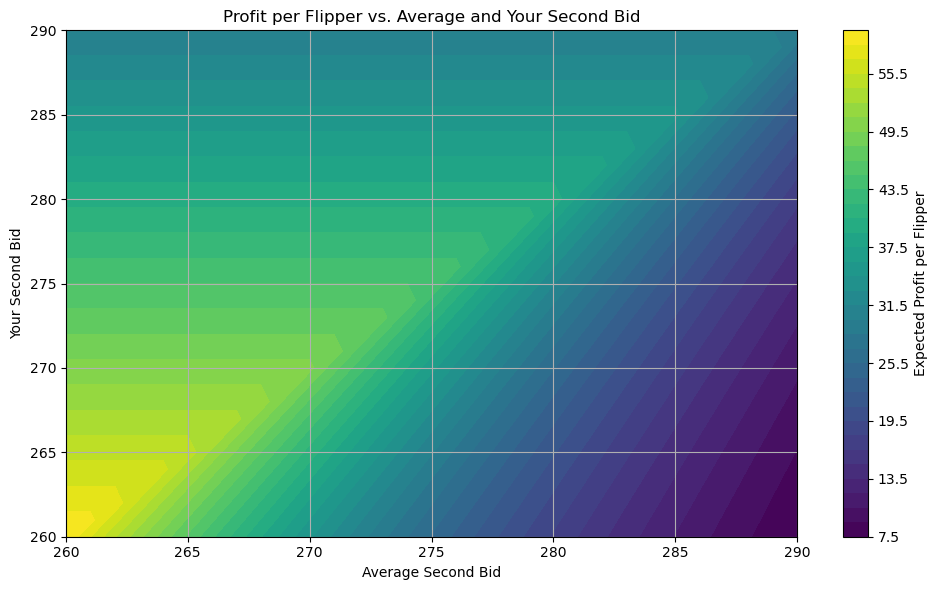

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
my_bids = np.arange(260, 291, 1)  # Your potential second bids from 260 to 290
avg_bids = np.arange(260, 291, 1)  # Simulated average second bids from 260 to 290

# Create a matrix to store profits
profits = np.zeros((len(my_bids), len(avg_bids)))

# Calculate scaled profit for each combination
for i, my_bid in enumerate(my_bids):
    for j, avg_bid in enumerate(avg_bids):
        if my_bid >= avg_bid:
            profit = 320 - my_bid
        else:
            # Apply penalty formula
            p = ((320 - avg_bid) / (320 - my_bid)) ** 3
            profit = (320 - my_bid) * p
        profits[i, j] = profit

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.contourf(avg_bids, my_bids, profits, levels=50, cmap="viridis")
plt.colorbar(c, label="Expected Profit per Flipper")
ax.set_xlabel("Average Second Bid")
ax.set_ylabel("Your Second Bid")
ax.set_title("Profit per Flipper vs. Average and Your Second Bid")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
True